# TF-IDF Heat Map
Alternate visualization method

In [117]:
import json

def load_data(file):
    with open(file, "r", encoding = "utf-8") as f:
        data = json.load(f)
    return(data)

Stats_data = load_data(r"C:\Users\isaia\OneDrive\Desktop\Academic work\Scholarly activities\Research voluntering\Research voluntering 2024 Dr. Sanocki\Stats & LLM\Topic-modeling\Stats_T.M_LDA\Data\Json Format\Sanocki_Stats_Data.json")




In [118]:
import string 
from nltk.corpus import stopwords  
import pandas as pd


custom_stopwords = ["also", "occur", "lets", "us", "likely", "would", "make", "may", "know", "aka", "ok", "versa", "vice", "well", "way"]
stops = stopwords.words("english") + custom_stopwords  

def clean_docs(docs):
    stops = stopwords.words("english")

    final = [] 
 
    for doc in docs:
        clean_doc = remove_stop_punc(doc, stops)
        final.append(clean_doc)

    return(final)    


def remove_stop_punc(text, stops):
    words = text.split()
    final = []
    for word in words:
        if word.lower() not in stops:
            final.append(word) 

    final = " ".join(final)

    final = "".join([i for i in final if not i.isdigit()])

    final = final.replace("/", " ")

    final = final.replace("-", " ")

    final = final.translate(str.maketrans("", "", string.punctuation + "()"))

    while "  " in final:
        final = final.replace("  ", " ")
    return (final)



In [119]:
Stats_data["Question 1"] = clean_docs(Stats_data["Question 1"])
Stats_data["Question 1"] = [remove_stop_punc(doc, stops) for doc in Stats_data["Question 1"]]

Stats_data_df = pd.DataFrame(Stats_data)



In [120]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

tfidf_matrix = vectorizer.fit_transform(Stats_data_df["Question 1"])

threshold = .01

filtered_tfidf_matrix = tfidf_matrix.multiply(tfidf_matrix >= threshold)

tfidf_df = pd.DataFrame(filtered_tfidf_matrix.toarray(),
                        columns = vectorizer.get_feature_names_out())



# Threshold setting

print(tfidf_df)




      accept  accepting  accuracy  accurate  additional  affects    allows  \
0   0.000000   0.000000  0.000000  0.000000    0.000000  0.00000  0.000000   
1   0.000000   0.000000  0.000000  0.000000    0.000000  0.00000  0.000000   
2   0.000000   0.000000  0.000000  0.000000    0.000000  0.00000  0.000000   
3   0.000000   0.000000  0.000000  0.000000    0.000000  0.00000  0.000000   
4   0.000000   0.000000  0.000000  0.000000    0.000000  0.00000  0.408641   
5   0.000000   0.000000  0.000000  0.151386    0.000000  0.00000  0.000000   
6   0.000000   0.000000  0.000000  0.000000    0.000000  0.00000  0.000000   
7   0.000000   0.000000  0.000000  0.263189    0.000000  0.00000  0.319529   
8   0.000000   0.000000  0.000000  0.000000    0.000000  0.00000  0.000000   
9   0.000000   0.000000  0.000000  0.000000    0.000000  0.00000  0.000000   
10  0.000000   0.000000  0.000000  0.151822    0.000000  0.00000  0.000000   
11  0.000000   0.000000  0.000000  0.000000    0.000000  0.09056

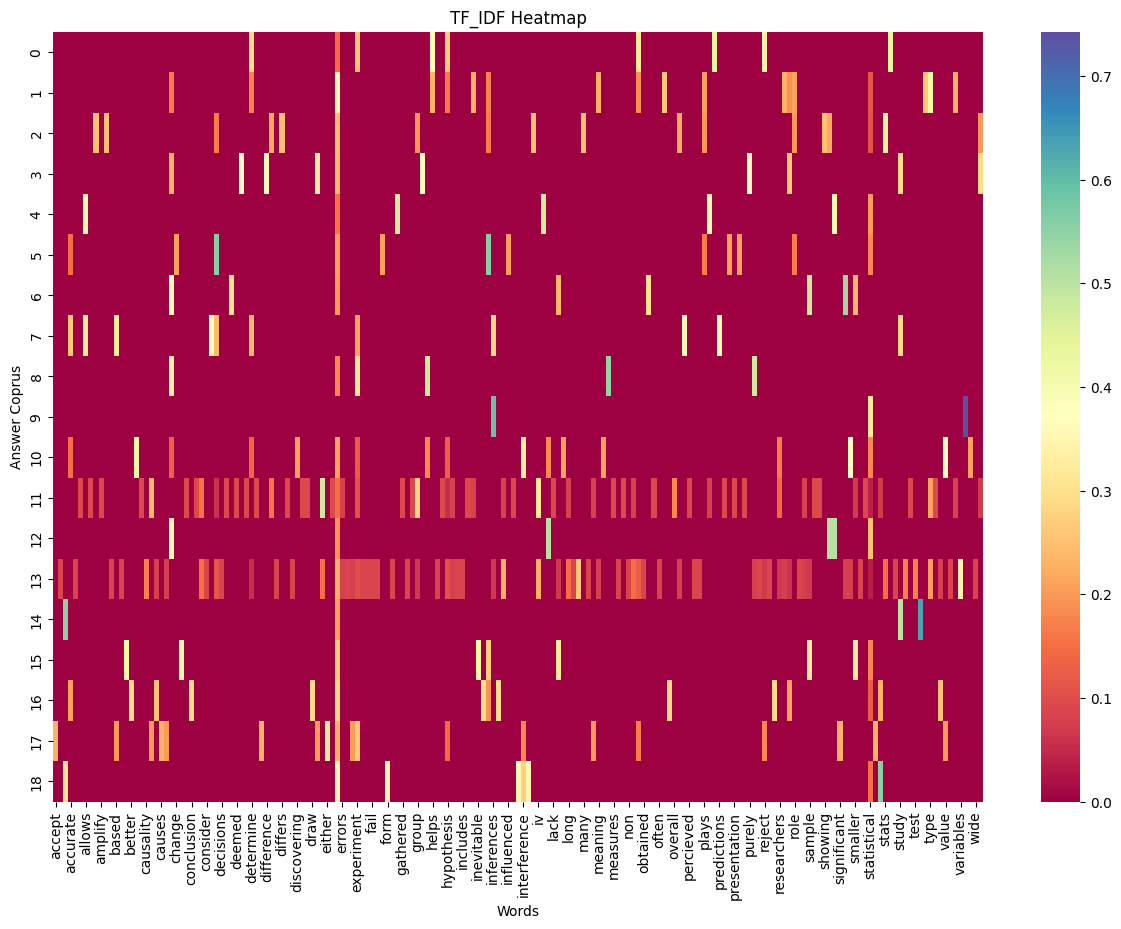

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize = (15, 10))

sns.heatmap(tfidf_df, annot = False, cmap = "Spectral", linewidths = .001)

plt.title("TF_IDF Heatmap")

plt.xlabel('Words')

plt.ylabel("Answer Coprus")

plt.show()
